# IMPORTING DATA AND DATA STATISTICS

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [0]:
train = pd.read_csv('train_V2.csv', header=0, sep=',', quotechar='"')
train.dropna(inplace=True)
print(len(train))
pd.options.display.max_columns = 2000
train.head()

4446965


Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0         0.00      0              0      0         60        1241      0   
1        91.47      0              0      0         57           0      0   
2        68.00      0              0      0         47           0      0   
3        32.90      0              0      0         75           0      0   
4       100.00      0              0      0         45           0      1   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0         0.00           1306  squad-fpp        28         26   
1            0         0.00           1777  squad-fpp        26         25   
2            0         0.00           1318        duo        50         47   
3            0         0.00           1436  squad-fpp        31         30   
4            1        58.53           1424   solo-fpp        97         95   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0          -1        0        0.0000          0          0.00          0   
1        1484        0        0.0045          0         11.04          0   
2        1491        0        0.0000          0          0.00          0   
3        1408        0        0.0000          0          0.00          0   
4        1560        0        0.0000          0          0.00          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                0        244.80                1       1466        0.4444  
1                0       1434.00                5          0        0.6400  
2                0        161.80                2          0        0.7755  
3                0        202.70                3          0        0.1667  
4                0         49.75                2          0        0.1875

In [0]:
test = pd.read_csv('test_V2.csv', header=0, sep=',', quotechar='"')
test.dropna(inplace=True)
print(len(test))
test.head()

1934174


Id         groupId         matchId  assists  boosts  \
0  9329eb41e215eb  676b23c24e70d6  45b576ab7daa7f        0       0   
1  639bd0dcd7bda8  430933124148dd  42a9a0b906c928        0       4   
2  63d5c8ef8dfe91  0b45f5db20ba99  87e7e4477a048e        1       0   
3  cf5b81422591d1  b7497dbdc77f4a  1b9a94f1af67f1        0       0   
4  ee6a295187ba21  6604ce20a1d230  40754a93016066        0       4   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0        51.46      0              0      0         73           0      0   
1       179.10      0              0      2         11           0      2   
2        23.40      0              0      4         49           0      0   
3        65.52      0              0      0         54           0      0   
4       330.20      1              2      1          7           0      3   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0         0.00           1884  squad-fpp        28         28   
1            1       361.90           1811    duo-fpp        48         47   
2            0         0.00           1793  squad-fpp        28         27   
3            0         0.00           1834    duo-fpp        45         44   
4            1        60.06           1326  squad-fpp        28         27   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0        1500        0           0.0          0           0.0          0   
1        1503        2        4669.0          0           0.0          0   
2        1565        0           0.0          0           0.0          0   
3        1465        0           0.0          0           0.0          0   
4        1480        1           0.0          0           0.0          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  
0                0         588.0                1          0  
1                0        2017.0                6          0  
2                0         787.8                4          0  
3                0        1812.0                3          0  
4                0        2963.0                4          0

In [0]:
train.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446965e+06  4.446965e+06  4.446965e+06  4.446965e+06   4.446965e+06   
mean   2.338150e-01  1.106908e+00  1.307172e+02  6.578757e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446965e+06  4.446965e+06  4.446965e+06  4.446965e+06  4.446965e+06   
mean   1.370148e+00  4.759936e+01  5.050062e+02  9.247835e-01  5.439553e-01   
std    2.679982e+00  2.746293e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  4.446965e+06   4.446965e+06  4.446965e+06  4.446965e+06  4.446965e+06   
mean   2.299760e+01   1.579507e+03  4.450468e+01  4.300760e+01  8.920103e+02   
std    5.097262e+01   2.587388e+02  2.382810e+01  2.328949e+01  7.366478e+02   
min    0.000000e+00   1.330000e+02  2.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.132000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.094000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.910000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  4.446965e+06  4.446965e+06  4.446965e+06  4.446965e+06  4.446965e+06   
mean   1.646590e-01  6.061158e+02  3.496092e-03  4.509323e+00  2.386841e-02   
std    4.721671e-01  1.498344e+03  7.337297e-02  3.050220e+01  1.673935e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.910000e-01  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03  1.200000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     4.446965e+06  4.446965e+06     4.446965e+06  4.446965e+06   
mean      7.918209e-03  1.154218e+03     3.660488e+00  6.064603e+02   
std       9.261158e-02  1.183497e+03     2.456543e+00  7.397005e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.551000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.856000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.976000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.013000e+03   

       winPlacePerc  
count  4.446965e+06  
mean   4.728216e-01  
std    3.074050e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

# DATA INSIGHTS

In [0]:
def plot_hist(x, title, noOfBins=50, col="#25203e"):
    
    fig, ax = plt.subplots(figsize=(8,8))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)

    sns.distplot(x, bins=noOfBins, kde=False, color=col)
    plt.xlabel('WinPlacePercentile',fontsize = 15,color='black')
    plt.ylabel('Frequency',fontsize = 15,color='black')
    plt.title(title,fontsize = 20,color='black')
    plt.savefig(title+'.png',format='png',dpi=800)    
    files.download(title+'.png')
    
def plot_hist1(x, title, noOfBins=50, col="#25203e"):
    
    fig, ax = plt.subplots(figsize=(10,8))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)
    plt.xlim(0.3,0.65)

    sns.distplot(x, bins=noOfBins, kde=False, ax=ax, color=col)
    plt.xlabel('Average Win Place Percentile of a Match',fontsize = 15,color='black')
    plt.ylabel('Frequency',fontsize = 15,color='black')
    plt.title('Histogram of Average Win Place Percentile of a Match',fontsize = 20,color='black')
    plt.savefig(title+'.png',format='png',dpi=800)    
    files.download(title+'.png')

In [0]:
print('The average winning percentile is {:.3f}, the median is {:.3f}'.format(train.winPlacePerc.mean(), train.winPlacePerc.median()))

The average winning percentile is 0.473, the median is 0.458


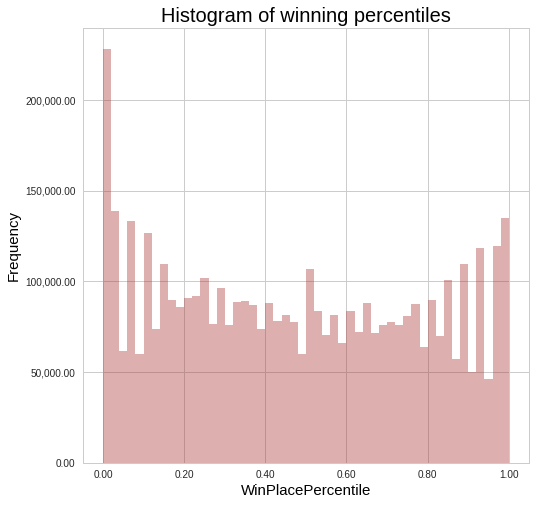

In [0]:
plot_hist(train.winPlacePerc, title='Histogram of winning percentiles', col = '#AA3939')

From the graph , we can see that our percentile distribution isn't exactly as uniform as we expected.There seems to be more cases occuring at low percentiles. This indicates that overall, we have more losers than winners.

The higher counts at the percentile extremes is to be expected. There is always some someone getting the percentiles scores of zero and 1, the rest of the scores varying across different matches.

Let's consider the average winning percentile per match and look at the distribution. As mentioned earlier, we should expect a normal distirbution with mean 0.5

In [0]:
train = train.assign(match_mean=train.groupby('matchId').winPlacePerc.transform('mean'))
train = train.assign(match_median = train.groupby('matchId').winPlacePerc.transform('median'))

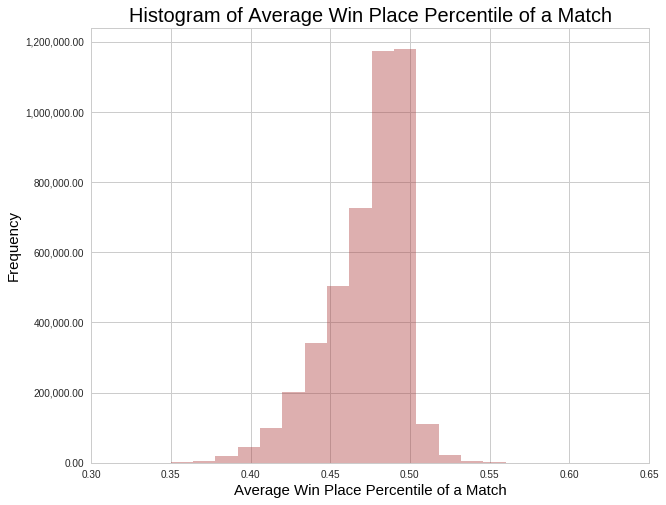

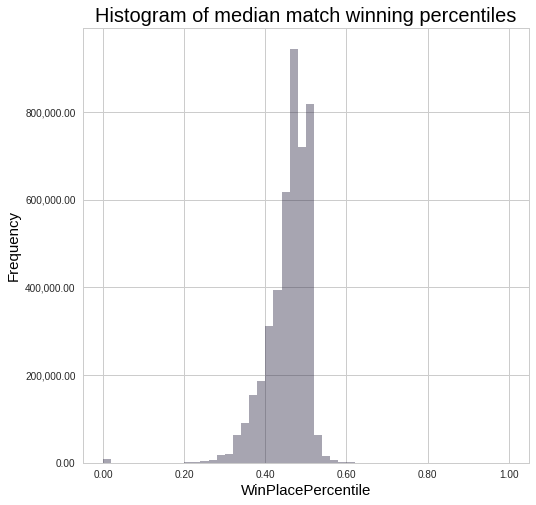

In [0]:
plot_hist1(train.match_mean, title='Histogram of average match winning percentiles', col='#AA3939')
plot_hist(train.match_median, title='Histogram of median match winning percentiles');

We expect that these values should resemble a normal distribution. But, what we find is that the mean distribution is somewhat right-tailed. 

We can infer that some games have lower average percentiles. The reason for this can be players leaving the game before it finishes. This leads to more people and teams having lower ranks 

In [0]:
train.drop(['match_mean','match_median'], axis=1)
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'match_mean',
       'match_median'],
      dtype='object')

## Pearson correlation between variables

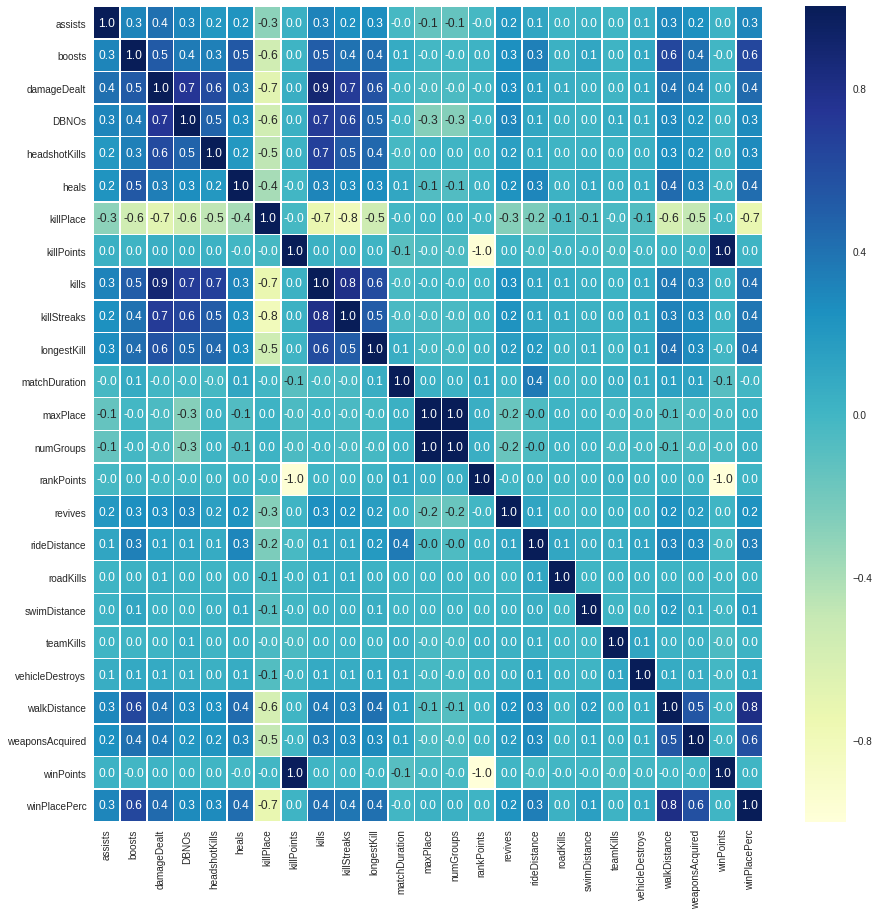

In [0]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.iloc[:,:-2].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
plt.savefig('Corelation_all.png',format='png', dpi = 1500)
files.download('Corelation_all.png')
plt.show()

In [0]:
train.groupby('matchId').mean()

assists    boosts  damageDealt     DBNOs  headshotKills  \
matchId                                                                    
0000a43bce5eec  0.357895  1.242105   142.523905  0.842105       0.178947   
0000eb01ea6cdd  0.265306  1.071429   134.407449  0.908163       0.265306   
0002912fe5ed71  0.031579  1.252632   112.595789  0.000000       0.263158   
0003b92987589e  0.220000  0.790000   112.365500  0.590000       0.210000   
0006eb8c17708d  0.236559  1.118280   134.813796  0.580645       0.215054   
00077604e50a63  0.438776  1.030612   144.266429  0.948980       0.224490   
00086c74bb4efc  0.193878  1.295918   127.982755  0.612245       0.265306   
00086e740a5804  0.051020  1.224490   124.745714  0.000000       0.285714   
001125344b660c  0.187500  1.218750   128.808437  0.677083       0.187500   
001360264d4b5f  0.197802  0.593407   116.476703  0.604396       0.175824   
0014d9d1b0aff6  0.106383  1.351064   136.718723  0.659574       0.287234   
001616ed5da99b  0.103093  1.175258   117.085870  0.000000       0.164948   
0016fe3ee17ce7  0.288660  1.144330   134.821804  0.536082       0.247423   
00177a6ce4dfb5  0.206522  1.086957   128.550000  0.576087       0.195652   
00188d50e054f5  0.195652  1.293478   111.808261  0.739130       0.195652   
001937f739426c  0.126316  1.126316   120.809400  0.000000       0.231579   
0019bc34b3c58e  0.268041  1.319588   119.731031  0.608247       0.216495   
0019d729577e9c  0.308511  1.127660   132.721702  0.691489       0.244681   
001cd8e7e6b737  2.208333  0.083333  1028.375000  0.000000       1.875000   
001e5e4799a31c  0.250000  0.880435   146.228261  0.869565       0.282609   
001e7bc06b1611  0.406780  1.983051   167.649492  0.779661       0.254237   
001eeedf57047a  0.070707  0.868687   116.947232  0.000000       0.212121   
00200fe5d9aae5  0.323232  1.161616   140.676566  1.020202       0.212121   
0022adebf59be6  0.020833  0.916667   116.349073  0.000000       0.229167   
0022e660571ee8  0.195876  1.195876   119.944536  0.701031       0.288660   
00232f9d9c5421  0.302083  1.260417   119.916250  0.833333       0.270833   
0025477f88bbd9  0.308511  1.244681   118.838723  0.925532       0.255319   
002771bd25fe0e  0.250000  1.163043   134.682283  0.836957       0.119565   
0027a504cd3b0c  0.252525  1.050505   143.387071  0.656566       0.222222   
0027b1ffb2e346  0.000000  0.058824   106.661765  0.000000       0.000000   
...                  ...       ...          ...       ...            ...   
ffdebe280440e8  0.232558  1.220930   146.921523  0.616279       0.267442   
ffdf8e9dc18596  0.244898  0.887755   121.351531  0.816327       0.193878   
ffdff4a21177ea  0.021739  0.891304   128.567065  0.000000       0.293478   
ffe08b9747a59f  0.063830  0.765957   122.839574  0.000000       0.202128   
ffe21d8fafaf43  0.239583  1.093750   133.350208  0.604167       0.166667   
ffe2a50b7023fb  0.056180  1.224719   112.461798  0.000000       0.303371   
ffe2ee39f210ff  0.000000  1.065217   116.465217  0.000000       0.206522   
ffe6c9fd39b935  0.204082  1.081633   121.823163  0.581633       0.173469   
ffe71c86ca1d81  0.072165  1.030928   109.670722  0.000000       0.278351   
ffe7d37a82297b  0.306122  0.989796   135.194082  0.632653       0.265306   
ffe94ff48407e7  0.204301  1.139785   129.116667  0.666667       0.236559   
ffead5be0b50e8  0.306122  1.000000   134.409286  0.928571       0.224490   
ffeaf5f7073d41  0.213483  1.146067   121.494831  0.797753       0.146067   
ffeb2131284e45  0.255319  1.436170   148.367394  0.946809       0.255319   
ffed6b75ebe4ce  0.186813  0.681319   123.986484  0.945055       0.285714   
ffed79cf43d7d7  0.247423  1.175258   134.964948  1.010309       0.237113   
ffef306edf6b36  0.163265  0.704082   119.184694  0.948980       0.214286   
fff0a2994a6f3a  0.206897  1.333333   144.682989  0.942529       0.252874   
fff2c218352941  0.336735  1.071429   129.638969  0.826531       0.163265   
fff2dfadd0635e  0.200000  1.500000   140.309500  0.775000       0

In [0]:
train['groupId'].value_counts()
len(train['groupId'].value_counts())

len(train['Id'].value_counts())

4446965

## PCA

In [0]:
y = train['winPlacePerc']
X = train.drop(['winPlacePerc','Id','matchId','groupId'],axis=1)

In [0]:
pca = PCA()
X['matchType'],_ = pd.factorize(X['matchType'])


In [0]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.explained_variance_ratio_)  

[4.83922111e-01 2.80616200e-01 2.16238835e-01 1.10309681e-02
 4.88548388e-03 2.03255479e-03 5.36838908e-04 3.10483610e-04
 1.94594853e-04 1.71875780e-04 5.69238369e-05 1.06152360e-06
 7.48085372e-07 5.35437952e-07 2.38643571e-07 2.12737244e-07
 1.08678567e-07 7.75365406e-08 5.14278056e-08 3.58088384e-08
 3.42389775e-08 1.83767248e-08 5.30341550e-09 1.57844581e-09
 1.00842268e-09 4.53690713e-10 2.70724081e-11]


In [0]:
print(pca.singular_values_)  

[3.35508479e+06 2.55488959e+06 2.24275902e+06 5.06550305e+05
 3.37108388e+05 2.17438727e+05 1.11747485e+05 8.49835965e+04
 6.72792964e+04 6.32299893e+04 3.63883908e+04 4.96913268e+03
 4.17149136e+03 3.52915183e+03 2.35608327e+03 2.22452623e+03
 1.58996556e+03 1.34297824e+03 1.09374168e+03 9.12663922e+02
 8.92434108e+02 6.53807386e+02 3.51231609e+02 1.91615486e+02
 1.53157077e+02 1.02729627e+02 2.50945384e+01]


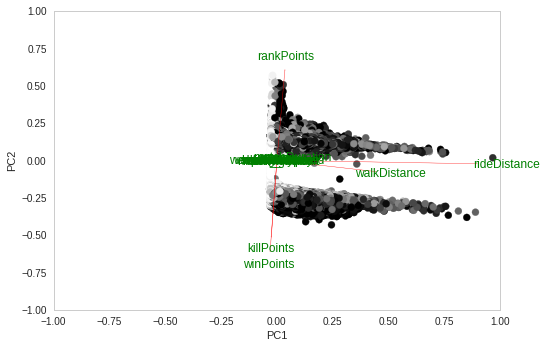

In [0]:
X_new = pca.fit_transform(X)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, X.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(X_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()
plt.savefig('PCA BiPlot.jpg', dpi = 1000)

#FEATURE ENGINEERING

In [0]:
def set_categorical(data):

  data.matchId = data.matchId.astype('category')
  data.matchId = data.matchId.cat.codes

  data.groupId = data.groupId.astype('category')
  data.groupId = data.groupId.cat.codes

set_categorical(train)
set_categorical(test)

In [0]:
def group_features(data):
  
  data['totalPlayers'] = data.groupby('matchId')['matchId'].transform('count')+1
  
  data['teamSize'] = data.groupby('groupId')['groupId'].transform('count')

  
  colsToNormalize = ['kills','damageDealt']

  for x in colsToNormalize:
    data[str(x+'Norm')] = data[x]/data['totalPlayers']*100
    
    
group_features(train)
group_features(test)

In [0]:
def add_matchType(data):
 
  solo = ['solo','solo-fpp','normal-solo-fpp','normal-solo']
  duo = ['duo','duo-fpp','normal-duo-fpp','normal-duo']
  squad = ['squad','squad-fpp','normal-squad-fpp','normal-squad']
  other = ['crashfpp','flaretpp','crashtpp','flarefpp']

  data['normMatchType'] = 'none'
  data.loc[data.eval("teamSize==1 & matchType in @solo & normMatchType=='none'"),'normMatchType'] = 'solo'
  data.loc[data.eval("teamSize<=2 & matchType in @duo & normMatchType=='none'"),'normMatchType'] = 'duo'
  data.loc[data.eval("teamSize<=4 & matchType in @squad & normMatchType=='none'"),'normMatchType'] = 'squad'
  data.loc[data.eval("teamSize>0 & normMatchType=='none'"),'normMatchType'] = 'other'
  
  
add_matchType(train)
add_matchType(test)    

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


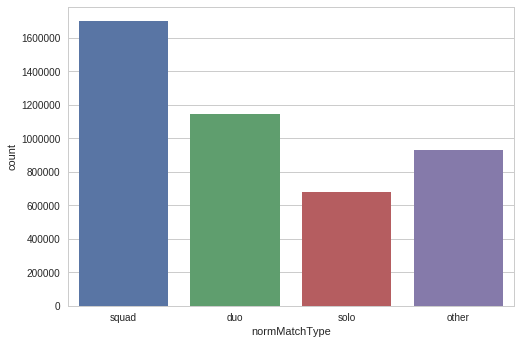

In [0]:
C

In [0]:
def feature_engineering(data):
  data['totalDistance'] = data.rideDistance+data.walkDistance+data.swimDistance
  data.totalDistance.fillna(0,inplace=True)
  data.totalDistance.replace(np.inf, 0, inplace=True)

  data['maxPossibleKills'] = data.totalPlayers-data.teamSize
  data.maxPossibleKills.fillna(0,inplace=True)
  data.maxPossibleKills.replace(np.inf, 0, inplace=True)

  data['itemsUsed'] = data.boosts + data.heals + data.weaponsAcquired
  data.itemsUsed.fillna(0,inplace=True)
  data.itemsUsed.replace(np.inf, 0, inplace=True)

  data['itemsPerDistance'] = data.itemsUsed/data.totalDistance
  data.itemsPerDistance.fillna(0,inplace=True)
  data.itemsPerDistance.replace(np.inf, 0, inplace=True)

  data['killsPerDistance'] = data.kills/data.totalDistance
  data.killsPerDistance.fillna(0,inplace=True)
  data.killsPerDistance.replace(np.inf, 0, inplace=True)

  data['damageDealtPerDistance'] = data.damageDealt / data.totalDistance
  data.damageDealtPerDistance.fillna(0,inplace=True)
  data.damageDealtPerDistance.replace(np.inf, 0, inplace=True)

  data['maxTeamKills'] = data.groupby('groupId')['kills'].max()
  data.maxTeamKills.fillna(0,inplace=True)
  data.maxTeamKills.replace(np.inf, 0, inplace=True)

  data['totalTeamKills'] = data.groupby('groupId')['kills'].sum()
  data.totalTeamKills.fillna(0,inplace=True)
  data.totalTeamKills.replace(np.inf, 0, inplace=True)

  data['headshotKillRate'] = data.headshotKills/data.kills
  data.headshotKillRate.fillna(0,inplace=True)
  data.headshotKillRate.replace(np.inf, 0, inplace=True)

  data['itemsUsedPerTeam'] = data.groupby('groupId')['itemsUsed'].sum()
  data.itemsUsedPerTeam.fillna(0,inplace=True)
  data.itemsUsedPerTeam.replace(np.inf, 0, inplace=True)

  data['percKill'] = data.kills / data.maxPossibleKills
  data.percKill.fillna(0,inplace=True)
  data.percKill.replace(np.inf, 0, inplace=True)

  data['percTeamKills'] = data.totalTeamKills / data.maxPossibleKills
  data.percTeamKills.fillna(0,inplace=True)
  data.percTeamKills.replace(np.inf, 0, inplace=True)

  data['meanTeamKillPlace'] = data.groupby('groupId')['killPlace'].mean()
  data.meanTeamKillPlace.fillna(0,inplace=True)
  data.meanTeamKillPlace.replace(np.inf, 0, inplace=True)
  
  data.matchType = data.matchType.astype('category')
  data.matchType = data.matchType.cat.codes
  
  
feature_engineering(train)
feature_engineering(test)


In [0]:
train.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0  7f96b2f878858a   613774    30085        0       0         0.00      0   
1  eef90569b9d03c   827822    32751        0       0        91.47      0   
2  1eaf90ac73de72   843520     3143        1       0        68.00      0   
3  4616d365dd2853  1340461    45260        0       0        32.90      0   
4  315c96c26c9aac  1757848    20531        0       0       100.00      0   

   headshotKills  heals  killPlace  killPoints  kills  killStreaks  \
0              0      0         60        1241      0            0   
1              0      0         57           0      0            0   
2              0      0         47           0      0            0   
3              0      0         75           0      0            0   
4              0      0         45           0      1            1   

   longestKill  matchDuration  matchType  maxPlace  numGroups  rankPoints  \
0         0.00           1306         15        28         26          -1   
1         0.00           1777         15        26         25        1484   
2         0.00           1318          2        50         47        1491   
3         0.00           1436         15        31         30        1408   
4        58.53           1424         13        97         95        1560   

   revives  rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
0        0        0.0000          0          0.00          0                0   
1        0        0.0045          0         11.04          0                0   
2        0        0.0000          0          0.00          0                0   
3        0        0.0000          0          0.00          0                0   
4        0        0.0000          0          0.00          0                0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  totalPlayers  \
0        244.80                1       1466        0.4444            97   
1       1434.00                5          0        0.6400            92   
2        161.80                2          0        0.7755            99   
3        202.70                3          0        0.1667            92   
4         49.75                2          0        0.1875            98   

   teamSize  killsNorm  damageDealtNorm normMatchType  totalDistance  \
0         4   0.000000         0.000000         squad       244.8000   
1         4   0.000000        99.423913         squad      1445.0445   
2         2   0.000000        68.686869           duo       161.8000   
3         1   0.000000        35.760870         squad       202.7000   
4         1   1.020408       102.040816          solo        49.7500   

   maxPossibleKills  itemsUsed  itemsPerDistance  killsPerDistance  \
0                93          1          0.004085          0.000000   
1                88          5          0.003460          0.000000   
2                97          2          0.012361          0.000000   
3                91          3          0.014800          0.000000   
4                97          2          0.040201          0.020101   

   damageDealtPerDistance  maxTeamKills  totalTeamKills  headshotKillRate  \
0                0.000000           1.0             2.0               0.0   
1                0.063299           1.0             1.0               0.0   
2                0.420272           0.0             0.0               0.0   
3                0.162309           3.0             6.0               0.0   
4                2.010050           1.0             1.0               0.0   

   itemsUsedPerTeam  percKill  percTeamKills  meanTeamKillPlace  
0               9.0  0.000000       0.021505          50.333333  
1               3.0  0.000000       0.011364          40.000000  
2               2.0  0.000000       0.000000          72.000000  
3              33.0  0.000000       0.065934          13.000000  
4               5.0  0.010309       0.010309          54.500000

In [0]:

flag = True

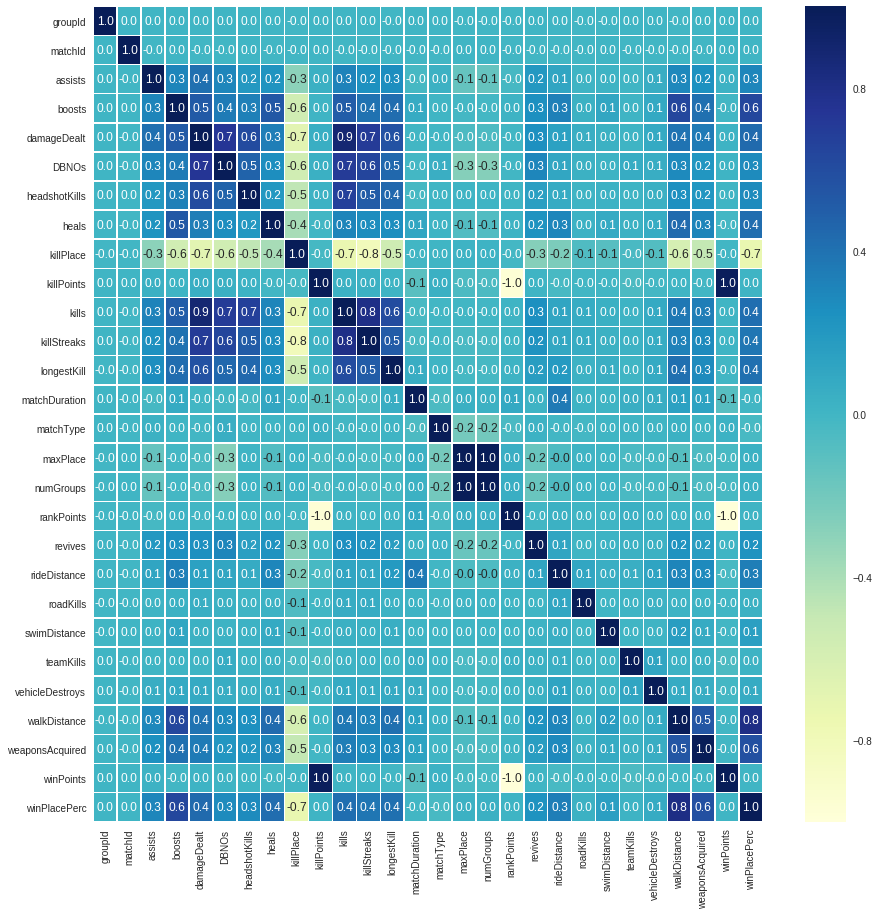

In [0]:
if flag==True:
  f,ax = plt.subplots(figsize=(15, 15))
  sns.heatmap(train.iloc[:,:29].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="YlGnBu", vmin=-1, vmax =1)
  plt.show()

In [0]:
def plot_hist3(x, title,binss=50):
    
    fig, ax = plt.subplots(figsize=(13,7))
    formatter = plt.FuncFormatter(lambda x, y: '{:,.2f}'.format(x))
    
    ax.yaxis.set_major_formatter(formatter=formatter)
    ax.xaxis.set_major_formatter(formatter=formatter)

    ax.set_title(title)
    sns.distplot(x, bins=binss, kde=False, ax=ax);

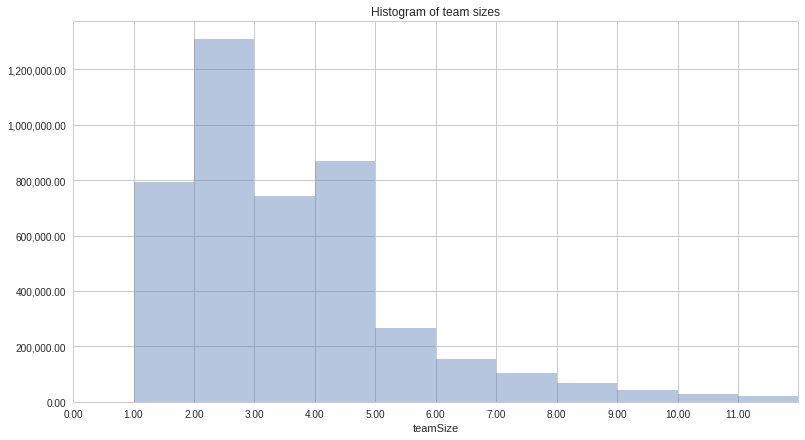

In [0]:
if flag==True:
  plot_hist3(train.teamSize, title='Histogram of team sizes',binss=73)
  
  plt.xlim(0,12)
  plt.xticks(range(12))

In [0]:
train.normMatchType = train.normMatchType.astype('category')
train.normMatchType = train.normMatchType.cat.codes

test.normMatchType = test.normMatchType.astype('category')
test.normMatchType = test.normMatchType.cat.codes


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


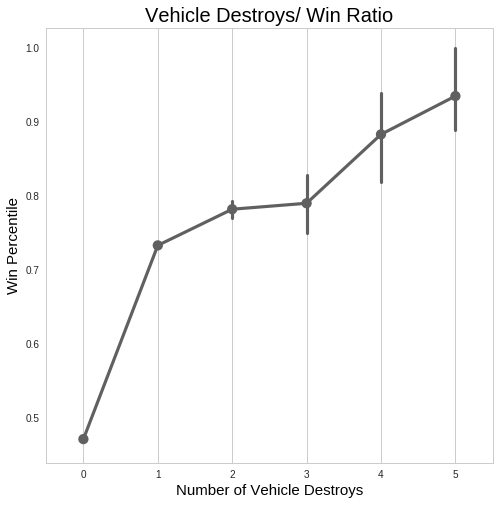

In [0]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
  plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='black')
  plt.ylabel('Win Percentile',fontsize = 15,color='black')
  plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='black')
  plt.grid()
  plt.savefig("vehicle.png",dpi=1000)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


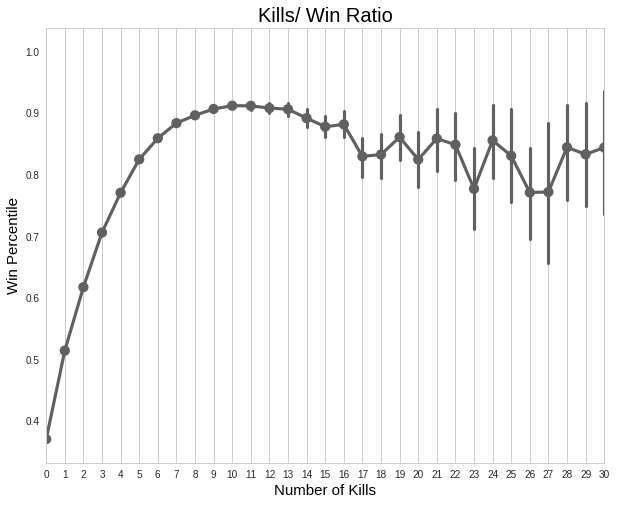

In [0]:
if flag==True:
  f,ax = plt.subplots(figsize=(10,8))
  sns.pointplot(x='kills',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
  plt.xlim(0,30)
  plt.xlabel('Number of Kills',fontsize = 15,color='black')
  plt.ylabel('Win Percentile',fontsize = 15,color='black')
  plt.title('Kills/ Win Ratio',fontsize = 20,color='black')
  plt.grid()
  plt.savefig("kills.png",dpi=1000)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


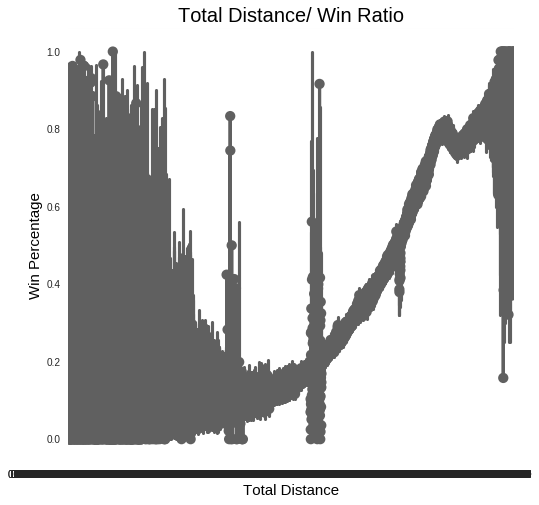

In [0]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  sns.pointplot(x='totalDistance',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
  plt.xlabel('Total Distance',fontsize = 15,color='black')
  plt.ylabel('Win Percentage',fontsize = 15,color='black')
  plt.title('Total Distance/ Win Ratio',fontsize = 20,color='black')
  plt.grid()
  plt.savefig("dist.png",dpi=600)
  plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


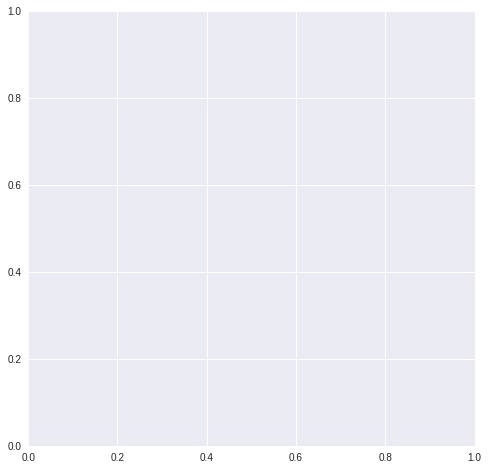

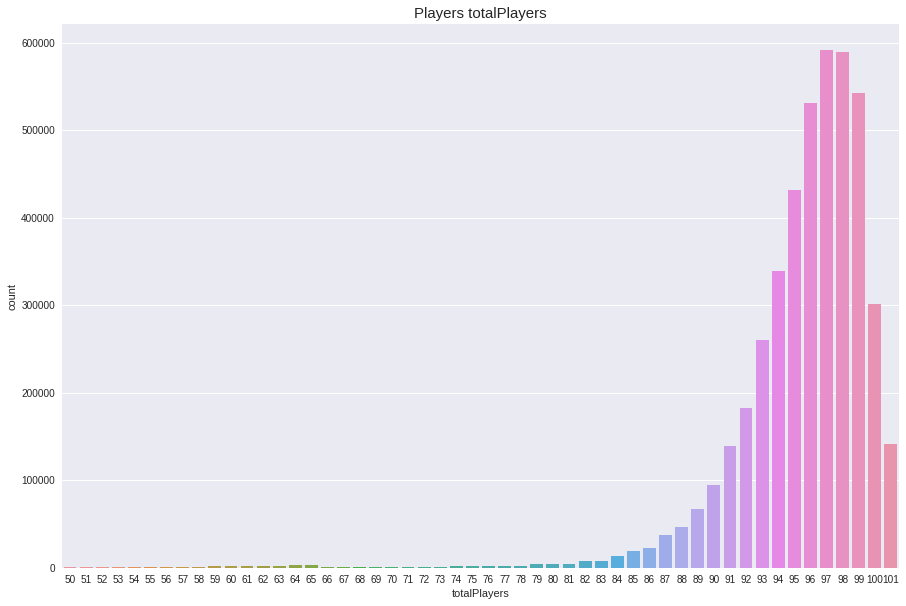

In [0]:
if flag==True:
  f,ax = plt.subplots(figsize=(8,8))
  highPlayer = train[train['totalPlayers']>49]
  plt.figure(figsize=(15,10))
  sns.countplot(highPlayer['totalPlayers'])
  plt.title("Players totalPlayers",fontsize=15)
  plt.savefig("totalplayers.png",dpi=600)
  plt.show()

In [0]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
y = train['winPlacePerc']
X = train.drop(['winPlacePerc','matchId','groupId','Id'],axis=1)


X_test = test.drop(['matchId','groupId','Id'],axis=1)

X.shape[1]

43

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7)

len(X_train)

del train,test,X,y


gc.collect()


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


118

# Model Selection

## LightGBM

In [0]:
def calculate_error(cl,name):
  print(name)
  print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_val, cl.predict(X_val))))
  print('R2 score is {:.2%}'.format(r2_score(y_val, cl.predict(X_val))))

In [0]:
gridParams = {
    'learning_rate': [0.05,0.1,0.3,0.002],
    'n_estimators': [50,250],
    'num_leaves': [6,10,16,200],
    'boosting_type' : ['gbdt','dart','goss','rf'],
    'objective' : ['mae'],
    }



mdl = LGBMRegressor(boosting_type= 'gbdt',
          objective = 'mae',
          n_estimators=250,
          learning_rate=0.3, 
          num_leaves=200, 
          n_jobs = 3, 
          silent = True,
          max_depth = -1, 
          verbose=2,
          random_state=212)



mdl.get_params().keys()


grid = GridSearchCV(mdl, gridParams,
                    verbose=2,
                    n_jobs=2)

grid.fit(X_train, y_train)


print(grid.best_params_)
print(grid.best_score_)

NameError: ignored

### Since, grid search takes a long time to run, we couldn't run it when compiling it in a final notebook

In [0]:
RANDOM_STATE=212

TARGET = 'winplaceperc'
TRAIN_SIZE = 0.9
EARLY_STOP_ROUNDS = 10
time_0 = datetime.datetime.now()

lgbm = LGBMRegressor(objective='mae', n_estimators=250,  
                     learning_rate=0.3, num_leaves=200, 
                     n_jobs=-1,  random_state=RANDOM_STATE, verbose=1)

lgbm.fit(X_train, y_train,
         eval_set=[(X_val, y_val)], 
         eval_metric='mae', early_stopping_rounds=EARLY_STOP_ROUNDS, 
         verbose=1)

time_1  = datetime.datetime.now()

print('Training took {} seconds. Best iteration is {}'.format((time_1 - time_0).seconds, lgbm.best_iteration_))

[1]	valid_0's l1: 0.19286
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's l1: 0.144091
[3]	valid_0's l1: 0.112807
[4]	valid_0's l1: 0.0921878
[5]	valid_0's l1: 0.0795694
[6]	valid_0's l1: 0.0716605
[7]	valid_0's l1: 0.0662104
[8]	valid_0's l1: 0.062826
[9]	valid_0's l1: 0.0609746
[10]	valid_0's l1: 0.0597035
[11]	valid_0's l1: 0.0588803
[12]	valid_0's l1: 0.0582907
[13]	valid_0's l1: 0.057764
[14]	valid_0's l1: 0.0570726
[15]	valid_0's l1: 0.0568547
[16]	valid_0's l1: 0.0566102
[17]	valid_0's l1: 0.0563797
[18]	valid_0's l1: 0.0562149
[19]	valid_0's l1: 0.0560829
[20]	valid_0's l1: 0.0560049
[21]	valid_0's l1: 0.0558181
[22]	valid_0's l1: 0.0557295
[23]	valid_0's l1: 0.0555972
[24]	valid_0's l1: 0.0555206
[25]	valid_0's l1: 0.0554388
[26]	valid_0's l1: 0.0553767
[27]	valid_0's l1: 0.0553458
[28]	valid_0's l1: 0.0553195
[29]	valid_0's l1: 0.0552607
[30]	valid_0's l1: 0.0552483
[31]	valid_0's l1: 0.0551807
[32]	valid_0's l1: 0.0551564
[33]	valid_0's l1: 0.0551

In [0]:
calculate_error(lgbm,"LGBM")

LGBM


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Mean Absolute Error is 0.05394
R2 score is 93.70%


In [0]:
y_predict = lgbm.predict(X_test)



In [0]:
y_predict

array([0.22722393, 0.9547446 , 0.70229252, ..., 0.88254854, 0.84077569,
       0.06085496])

In [0]:
sub = pd.read_csv('sample_submission_V2.csv', header=0, sep=',', quotechar='"')
sub.drop(['winPlacePerc'],axis=1 )
sub['winPlacePerc'] = y_predict
sub.head()

Id  winPlacePerc
0  9329eb41e215eb      0.227224
1  639bd0dcd7bda8      0.954745
2  63d5c8ef8dfe91      0.702293
3  cf5b81422591d1      0.506421
4  ee6a295187ba21      0.947875

In [0]:
sub.to_csv("sample_submission.csv")

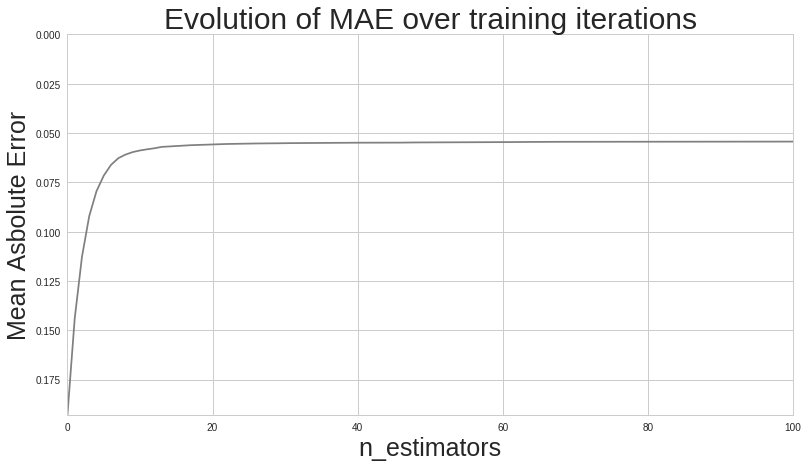

In [0]:
def plot_training(lgbm):
    
    fig, ax = plt.subplots(figsize=(13,7))
    plt.rcParams.update({"font.size":"20"})
    losses = lgbm.evals_result_['valid_0']['l1']
    ax.set_ylim(np.max(losses), 0)
    ax.set_xlim(0,100)
    plt.rc('xtick', labelsize=20)    
    
    plt.rc('ytick', labelsize=20)
    
    ax.set_xlabel('n_estimators',fontsize=25)
    ax.set_ylabel('Mean Asbolute Error',fontsize=25)
    ax.set_title('Evolution of MAE over training iterations',fontsize=30)
    ax.plot(losses, color='grey');
    plt.savefig("lgbmmae.png",dpi=500)
    
plot_training(lgbm)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


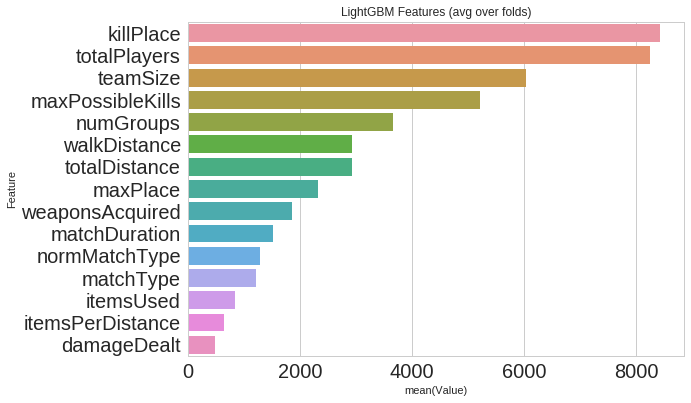

In [0]:
cols_to_drop = ['Id', 'groupId', 'matchId', 'winPlacePerc']
cols_to_fit = [col for col in X_train.columns if col not in cols_to_drop]
feature_importance = pd.DataFrame(sorted(zip(lgbm.feature_importances_, cols_to_fit)), columns=['Value','Feature'])
feature_importance = feature_importance.tail(15)


plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig("lgbmfeatures.png",dpi=500)


## Regression Models

In [0]:
def runAllModels(X_train, Y_train):
        
    linear = LinearRegression(copy_X=True)
    linear.fit(X_train,Y_train)
    calculate_error(linear,"linear")

    ridge = Ridge(copy_X=True)
    ridge.fit(X_train,Y_train)
    calculate_error(ridge,"ridge")
    
    lasso = Lasso(copy_X=True)
    lasso.fit(X_train,Y_train)
    calculate_error(lasso,"lasso")
    
    elastic = ElasticNet(copy_X=True)
    elastic.fit(X_train,Y_train)
    calculate_error(elastic,"elastic")
    
    ada = AdaBoostRegressor(learning_rate=0.8)
    ada.fit(X_train,Y_train)
    calculate_error(ada,"Adaboost")
    
    GBR = GradientBoostingRegressor(learning_rate=0.8)
    GBR.fit(X_train,Y_train)
    calculate_error(GBR,"GBR")

    forest = RandomForestRegressor(n_estimators=10)
    forest.fit(X_train,Y_train)
    calculate_error(forest,"forest")
    
    tree = DecisionTreeRegressor()
    tree.fit(X_train,Y_train)
    calculate_error(tree,"tree")

In [0]:
runAllModels(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


linear
Mean Absolute Error is 0.08721
R2 score is 83.83%
ridge
Mean Absolute Error is 0.08715
R2 score is 83.84%
lasso
Mean Absolute Error is 0.12087
R2 score is 74.46%
elastic
Mean Absolute Error is 0.11303
R2 score is 77.10%


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-pack

Adaboost
Mean Absolute Error is 0.09713
R2 score is 82.85%
GBR
Mean Absolute Error is 0.05831
R2 score is 93.05%
forest


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Mean Absolute Error is 0.05743
R2 score is 93.03%
tree
Mean Absolute Error is 0.07706
R2 score is 86.99%


## Neural Net

### Simple MLP

In [0]:
mlp = MLPRegressor(activation = 'relu',
                               max_iter=10000,learning_rate='adaptive',
                               tol=0.0,warm_start=True,solver='adam', verbose=True)
mlp.fit(X_train,y_train)
calculate_error(mlp,"MLP")

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Iteration 1, loss = 22.39872526
Iteration 2, loss = 3.38558040
Iteration 3, loss = 2.06050984
Iteration 4, loss = 0.61622816
Iteration 5, loss = 0.62046392
Iteration 6, loss = 0.40559269
Iteration 7, loss = 1.28667318
Iteration 8, loss = 0.34655277
Iteration 9, loss = 0.22156778
Iteration 10, loss = 0.03770630
Iteration 11, loss = 0.02100452
Iteration 12, loss = 0.52963382
Iteration 13, loss = 0.44018969
Iteration 14, loss = 0.03515462
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.
MLP
Mean Absolute Error is 0.08622
R2 score is -121.94%


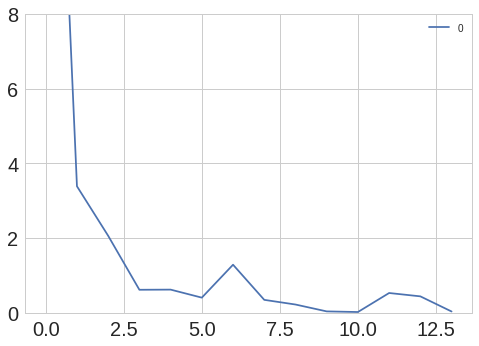

In [0]:
pd.DataFrame(mlp.loss_curve_).plot(ylim=[0,8])

### Deep Learning

In [0]:
filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

def compare(best, new):
  return best.losses['val_loss'] > new.losses['val_loss']

def path(new):
  if new.losses['val_loss'] < 0.1:
    return 'pubg_%s.h5' % new.losses['val_loss']

cb = [
      checkpoint,
      utils.GDriveCheckpointer(compare,path),
      keras.callbacks.TensorBoard(log_dir=os.path.join(utils.LOG_DIR,'PUBG'))
]

--2018-12-02 20:25:38--  https://raw.githubusercontent.com/Zahlii/colab-tf-utils/master/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6935 (6.8K) [text/plain]
Saving to: ‘utils.py.1’

utils.py.1          100%[===================>]   6.77K  --.-KB/s    in 0s      

2018-12-02 20:25:38 (85.6 MB/s) - ‘utils.py.1’ saved [6935/6935]



In [0]:
def build_model():
  model = Sequential()
  model.add(Dense(512, kernel_initializer='he_normal', input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(256, kernel_initializer='he_normal', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  optim = optimizers.Adam(lr=0.01, epsilon=1e-8, decay=1e-4, amsgrad=False)
  model.compile(optimizer=optim, loss='mse', metrics=['mae'])
  #model.summary
  #history = model.fit(X_train, y_train, epochs=70,batch_size=100000)
  return model

In [0]:
downloader=GDriveSync()
filename='pubg_0.007696801999306263.h5'
drive_file_path=downloader.find_items(filename)[0]
downloader.download_file_to_folder(drive_file_path,filename)

In [0]:
deep = build_model()

In [0]:

#deep.load_weights(filename)
deep = load_model(filename)
optim = optimizers.Adam(lr=0.01, epsilon=1e-8, decay=1e-4, amsgrad=False)
deep.compile(optimizer=optim, loss='mse', metrics=['mae'])

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               22528     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
__________

In [0]:
deep.load_weights("weights-improvement-06-0.01.hdf5")

In [0]:
history = deep.fit(X_train, y_train, 
                 validation_data=(X_val, y_val),
                 initial_epoch=20,
                 epochs=30,
                 callbacks=cb,
                 verbose=1)

calculate_error(deep,"Deep")

Train on 3112875 samples, validate on 1334090 samples
Epoch 21/30
3112875/3112875 [==============================] - 1500s 482us/step - loss: 0.0075 - mean_absolute_error: 0.0636 - val_loss: 0.0085 - val_mean_absolute_error: 0.0657

Epoch 00021: val_loss did not improve from 0.00811
No improvement.
Epoch 22/30
3112875/3112875 [==============================] - 1441s 463us/step - loss: 0.0075 - mean_absolute_error: 0.0635 - val_loss: 0.0083 - val_mean_absolute_error: 0.0654

Epoch 00022: val_loss did not improve from 0.00811
No improvement.
Epoch 23/30
 775104/3112875 [======>.......................] - ETA: 16:59 - loss: 0.0075 - mean_absolute_error: 0.0635Buffered data was truncated after reaching the output size limit.

In [0]:
calculate_error(deep,"Deep")

Deep


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


Mean Absolute Error is 0.06441
R2 score is 90.92%


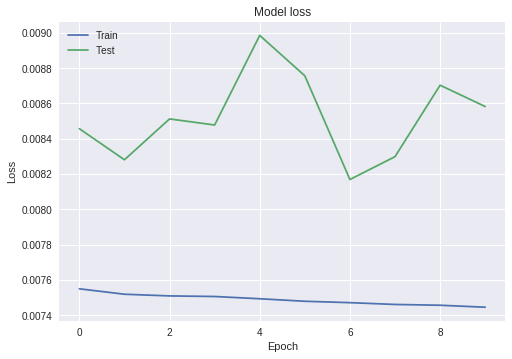

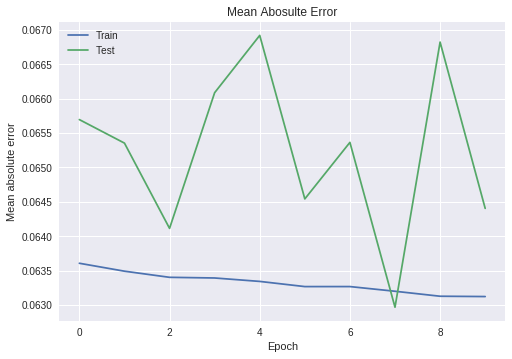

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation mae values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Abosulte Error')
plt.ylabel('Mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## SVR

In [0]:
from sklearn.svm import SVR
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
clf = SVR(gamma=0.001, C=1.0, epsilon=0.2)
clf.fit(X_train, y_train) 

In [0]:
calculate_error(clf)